# PV-Live

Description of the station network from [Lorenz, E. (2021)](https://doi.org/10.1016/j.solener.2021.11.023):
> "The irradiance measurement network set up in the project PV-Live consists of 40 measurement stations in the control area of the transmission system operator TransnetBW. With their rather even distribution a good representation of the mean irradiance conditions in the grid area is achieved. The distance between neighbouring measurement stations ranges between 15 km and 35 km. Details of the station locations, including coordinates and heights, are given in Table 1. Most stations are installed close to PV power plants. A few of them are located at outposts and buildings of TransnetBW, public utilities and other station partners.
>
> A PV-Live measurement station ... consists of a SMP10 thermopile pyranometer (Kipp and Zonen, 2020), which measures GHI, and three Mencke & Tegtmeyer Si sensors (silicon photovoltaic reference cells; [Ingenieurbüro Mencke & Tegtmeyer GmbH](https://www.imt-solar.com/solar-irradiance-sensors/si-sensor/), 2020), which measure GTI. The three Si sensors are oriented towards east (90°), south (180°) and west (270°) and have tilt angles of 25°. Besides irradiance also temperature is measured by the pyranometer as well as the silicon sensors.
>
> The SMP10 pyranometers are ISO-9060 (International Organization for Standardization, 2018) spectrally flat Class A sensors. They are not equipped with ventilation units, because these would have caused considerable additional costs and an increase in electricity consumption."

References:
- [Journal paper](https://doi.org/10.1016/j.solener.2021.11.023)
- [Conference paper](https://doi.org/10.4229/EUPVSEC20202020-5BO.7.4)
- [Data (Zenodo)](https://doi.org/10.5281/zenodo.7311989)

<br>

The 40 stations in the network are:

In [16]:
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

stations = pd.DataFrame(
    columns=['ID', 'Station name', 'Latitude', 'Longitude', 'Altitude'],
    data=[    
    [1, 'Wendlingen', 48.667, 9.399, 276],
    [2, 'Stuttgart', 48.83, 9.196, 294],
    [3, 'St. Leon-Rot', 49.245, 8.641, 108],
    [4, 'Ketsch', 49.356, 8.532, 102],
    [5, 'Freiburg', 48.009, 7.835, 256],
    [6, 'Mahlberg', 48.28, 7.787, 170],
    [7, 'Murr', 48.968, 9.263, 212],
    [8, 'Fünfstetten', 48.837, 10.773, 504],
    [9, 'Freudenstadt', 48.459, 8.425, 669],
    [10, 'Karlsruhe', 49.008, 8.344, 115],
    [11, 'Oberndorf', 48.298, 8.552, 667],
    [12, 'Ulm', 48.422, 10.006, 552],
    [13, 'Bad Rappenau', 49.268, 9.059, 288],
    [14, 'Offenburg', 48.473, 7.939, 151],
    [15, 'Grünstadt', 49.562, 8.188, 157],
    [16, 'Löffingen', 47.885, 8.4, 745],
    [17, 'Aitrach', 47.927, 10.09, 601],
    [18, 'Neusass', 49.612, 9.35, 441],
    [19, 'Tuttlingen', 47.957, 8.78, 649],
    [20, 'Hechingen', 48.36, 8.966, 490],
    [21, 'Leutkirch', 47.836, 9.988, 648],
    [22, 'Königsbronn', 48.751, 10.169, 637],
    [23, 'Lörrach', 47.613, 7.655, 284],
    [24, 'Ingoldingen', 47.996, 9.699, 573],
    [25, 'Eberbach', 49.465, 8.987, 137],
    [26, 'Zwiefaltendorf', 48.207, 9.513, 523],
    [27, 'Krautheim', 49.396, 9.605, 382],
    [28, 'Pforzheim', 48.899, 8.746, 312],
    [29, 'Weikersheim', 49.457, 9.889, 370],
    [30, 'Konstanz', 47.674, 9.163, 402],
    [31, 'Leibertingen', 48.064, 9.068, 763],
    [32, 'Crailsheim', 49.132, 10.054, 416],
    [33, 'Ravensburg', 47.786, 9.608, 432],
    [34, 'Herdwangen-Schönach', 47.854, 9.137, 660],
    [35, 'Schwäbisch Hall', 49.117, 9.774, 399],
    [36, 'Baden-Baden', 48.787, 8.189, 127],
    [37, 'Neubulach', 48.649, 8.654, 621],
    [38, 'Waldshut-Tiengen', 47.624, 8.255, 345],
    [39, 'Schwäbisch Gmünd', 48.803, 9.8, 326],
    [40, 'Berghülen', 48.455, 9.778, 667]
])

stations = stations.set_index('ID')

show(stations, scrollY="500px", scrollCollapse=False, paging=False, classes="display",
     order=[[0, "asc"]], showIndex=False, columnDefs=[{"className": "dt-left", "targets": "_all"}])

<IPython.core.display.Javascript object>

<br>

And a nice map, just to get a sense of the distribution of the stations:

In [17]:
import folium
from folium import plugins

EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

# Create Folium map
m = folium.Map(
    location=[48.5821, 8.9539],
    zoom_start=6, min_zoom=4, max_bounds=True,
    control_scale=True,  # Adds distance scale in lower left corner
    tiles='openstreetmap',
)

# Add each station to the map
for index, row in stations.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station name'],
        radius=5).add_to(m)

folium.raster_layers.TileLayer(EsriImagery, name='World imagery', attr=EsriAttribution, show=False).add_to(m)
folium.LayerControl(position='topright').add_to(m)
folium.LatLngPopup().add_to(m)  # Show latitude/longitude when clicking on the map
plugins.Fullscreen(position='bottomright').add_to(m)  # Add full screen button to map

# Show the map
m

## Data availability

> "The PV-Live irradiance and temperature measurements ... are made publicly available on the open-access repository Zenodo (European Organization For Nuclear Research and OpenAIRE, 2013) through the DOI: [10.5281/zenodo.4036728](https://doi.org/10.5281/zenodo.4036728) (Dittmann et al., 2021), starting with data of September 2020. The data set is extended by adding data of the previous month on a monthly basis. All measurement values are provided with quality flags as described in Section 6.
>
> Near real-time availability is an important aspect of the PV-Live network. Measurements are taken once per second and stored as oneminute mean values. Near real-time data transfer of these minute values is achieved by using the mobile phone network to establish connections of the measurement stations with Fraunhofer ISE. In addition, the measurements are stored in an internal memory. In case a measurement station is temporarily unavailable, the data is completed automatically, when the connection is re-established."

<br>

Below is an example of how to retrieve time series irradiance data from the PV-Live network.

In [18]:
import urllib.request
import io
import zipfile
import os
import pandas as pd
import warnings


PVLIVE_BASE_URL ='https://zenodo.org/record/7311989/files/'

def get_pvlive(station, start, end):
    """
    Retrieve ground measured irradiance data from the PV-Live network.

    The PV-Live network consists of 40 solar irradiance measurement stations
    across the German state of Baden-Württemberg. All stations measure global
    horizontal irradiance and temperature with a pyranometer, and global tilted
    irradiance in east, south, and west direction with tilt angles of 25° with
    three photovoltaic reference cells in minute resolution [1]_.
    
    Data is available from Zenodo [2]_.

    Parameters
    ----------
    station: int
        Station number (integer). All stations can be requested by specifying
        station='all'.
    start: datetime-like
        First day of the requested period
    end: datetime-like
        Last day of the requested period

    Returns
    -------
    data: DataFrame
        timeseries data from the PV-LIVE measurement network.
    metadata: dict
        metadata (not currently available).

    Warns
    -----
    UserWarning
        If one or more requested files are missing a UserWarning is returned.

    Notes
    -----
    Data is returned for the entire months between and including start and end.

    Examples
    --------
    >>> # Retrieve two months irradiance data PV-Live station 1
    >>> data, metadata = get_pvlive(station=1,  # doctest: +SKIP
    >>>     start=pd.Timestamp(2021,1,1), end=pd.Timestamp(2021,2,28),   # doctest: +SKIP

    References
    ----------
    .. [1] `High resolution measurement network of global horizontal and tilted solar
        irradiance in southern Germany with a new quality control scheme. Elke Lorenz
        et al. 2022. Solar Energy.
        <https://doi.org/10.1016/j.solener.2021.11.023/>`_
    .. [2] `Zenodo
       <https://doi.org/10.5281/zenodo.4036728>`_
    """  # noqa: E501

    months = pd.date_range(start, end.replace(day=1)+pd.DateOffset(months=1), freq='1M')

    dfs_inter_months = []  # Initialize list for holding dataframes
    for m in months:
        # Generate URL to the monthly ZIP archive
        url = f"{PVLIVE_BASE_URL}pvlive_{m.year}-{m.month:02}.zip?download=1"
        try:
            remotezip = urllib.request.urlopen(url)
        except urllib.error.HTTPError as e:
            if 'not found' in e.msg.lower():
                warnings.warn('File was not found. The selected time period is probably '
                              'outside the available time period')
                continue
            else:
                raise
        zipinmemory = io.BytesIO(remotezip.read())
        zip = zipfile.ZipFile(zipinmemory)

        dfs_intra_months = []
        for filename in zip.namelist():
            basename = os.path.basename(filename)  # Extract file basename
            # Parse file if extension is file starts wtih 'tng' and ends with '.tsv'
            if basename.startswith('tng') & basename.endswith('.tsv'):
                # Extract station number from file name
                station_number = int(basename[6:8])
                if (station=='all') | (station==station_number):
                    # Read data into pandas dataframe
                    dfi = pd.read_csv(io.StringIO(zip.read(filename).decode("utf-8")),
                                      sep='\t', index_col=[0], parse_dates=[0])

                    if station == 'all':
                        # Add station number to column names (MultiIndex)
                        dfi.columns = [[station_number]*dfi.shape[1], dfi.columns]
                    # Add dataframe to list
                    dfs_intra_months.append(dfi)
        dfs_inter_months.append(pd.concat(dfs_intra_months, axis='columns'))
    data = pd.concat(dfs_inter_months, axis='rows')

    meta = {}
    return data, meta

In [19]:
df, _ = get_pvlive(
    station=1,
    start=pd.Timestamp(2021,1,1),
    end=pd.Timestamp(2021,1,31))

df.loc['2021-01-02 09:00': '2021-01-02 09:05'] # Print six minutes of measurements

Gg_pyr  flag_Gg_pyr  Gg_si_south  flag_Gg_si_south  \
datetime                                                                  
2021-01-02 09:00:00    42.5            0         41.6                 0   
2021-01-02 09:01:00    45.5            0         45.0                 0   
2021-01-02 09:02:00    48.7            0         48.0                 0   
2021-01-02 09:03:00    51.3            0         50.6                 0   
2021-01-02 09:04:00    53.7            0         52.9                 0   
2021-01-02 09:05:00    56.5            0         56.2                 0   

                     Gg_si_east  flag_Gg_si_east  Gg_si_west  flag_Gg_si_west  \
datetime                                                                        
2021-01-02 09:00:00        42.7                0        35.9                0   
2021-01-02 09:01:00        45.6                0        38.9                0   
2021-01-02 09:02:00        48.5                0        41.9                0   
2021-01-02 09:03:00        51.0                0        44.2                0   
2021-01-02 09:04:00        53.6                0        46.1                0   
2021-01-02 09:05:00        56.5                0        48.6                0   

                     T_pyr  flag_T_pyr  flag_shading  
datetime                                              
2021-01-02 09:00:00    0.3           0             0  
2021-01-02 09:01:00    0.3           0             0  
2021-01-02 09:02:00    0.3           0             0  
2021-01-02 09:03:00    0.3           0             0  
2021-01-02 09:04:00    0.3           0             0  
2021-01-02 09:05:00    0.3           0             0

### Visualize measurement data

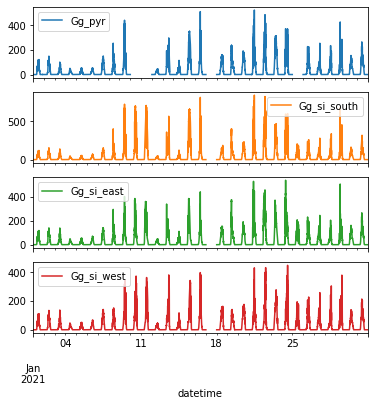

In [20]:
_ = df[['Gg_pyr', 'Gg_si_south', 'Gg_si_east', 'Gg_si_west']].plot(
    subplots=True, sharex=True, figsize=(6,6))

### Visualize one day of measurement data

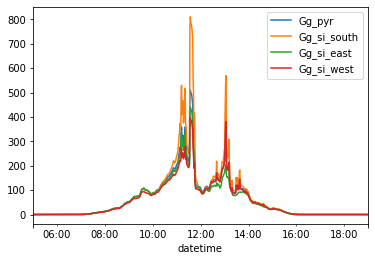

In [21]:
_ = df[['Gg_pyr', 'Gg_si_south', 'Gg_si_east', 'Gg_si_west']].loc['2021-01-16 05':'2021-01-16 18'].plot()

### Weekly incident irradiation

<Axes: xlabel='datetime'>

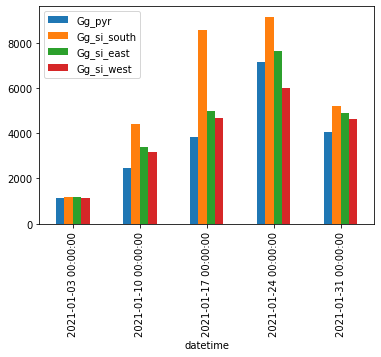

In [22]:
df[['Gg_pyr', 'Gg_si_south', 'Gg_si_east', 'Gg_si_west']].resample('1h').mean().resample('1w').sum().plot.bar()